In [105]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import metrics
from sklearn import tree

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [106]:
# Read dataset
df = pd.read_csv("Data/1_lebron_james_shot_chart_1_2023.csv")
# df = pd.read_csv("Data/2_james_harden_shot_chart_2023.csv")
# df = pd.read_csv("Data/3_stephen_curry_shot_chart_2023.csv")

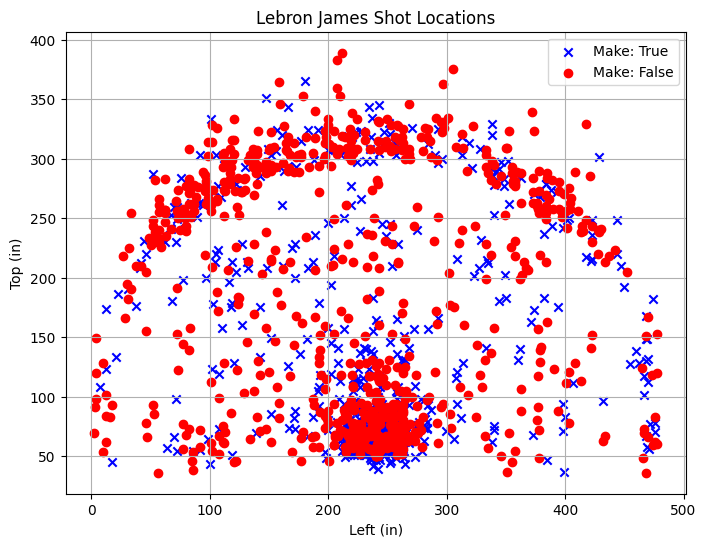

In [107]:
true_points = df[df["result"]] 
false_points = df[~df["result"]]

plt.figure(figsize=(8, 6)) 
plt.scatter(true_points["left"], true_points["top"], marker='x', color='blue', label='Make: True') 
plt.scatter(false_points["left"], false_points["top"], marker='o', color='red', label='Make: False')
plt.xlabel("Left (in)") 
plt.ylabel("Top (in)") # Add legend 
plt.legend() # Display the graph 
plt.title("Lebron James Shot Locations") 
plt.grid(True) 
plt.show() 

In [108]:
print(f"Initial columns: {df.columns.tolist()}\n")

df['score_difference'] = df['lebron_team_score'] - df['opponent_team_score']
# Drop columns
columns_to_drop = [
    "season",
    "color",
    "opponent_team_score",
    "date",
    "qtr",
    # "time_remaining",
    "lebron_team_score",
    "lead",
    "opponent",
    "team",
    # "left",
    # "top",
    "shot_type",
]
df.drop(columns_to_drop, axis=1, inplace=True)

# df = df[df["shot_type"] == 2]

print(f"Final head:\n{df.head()}")

Initial columns: ['top', 'left', 'date', 'qtr', 'time_remaining', 'result', 'shot_type', 'distance_ft', 'lead', 'lebron_team_score', 'opponent_team_score', 'opponent', 'team', 'season', 'color']

Final head:
   top  left time_remaining  result  distance_ft  score_difference
0  310   203          09:26   False           26                 0
1  213   259          08:38   False           16                -1
2  143   171          08:10   False           11                -3
3   68   215          05:24    True            3                -7
4   66   470          01:02   False           23                -1


In [109]:
# convert time to numerical
minutes = df["time_remaining"].str.split(":", expand=True)[0].astype(int)
seconds = df["time_remaining"].str.split(":", expand=True)[1].astype(int)
df["time_remaining"] = minutes * 60 + seconds

In [110]:
layup_data = df[df["distance_ft"] <= 5]
midrange_data = df[(df["distance_ft"] > 5) & (df["distance_ft"] < 22)]
three_data = df[df["distance_ft"] >= 22]

print(f"Layup data:\n{layup_data.head()}")

print(f"\nLayup shape: {layup_data.shape}")
print(f"Midrange shape: {midrange_data.shape}")
print(f"Three shape: {three_data.shape}")


Layup data:
    top  left  time_remaining  result  distance_ft  score_difference
3    68   215             324    True            3                -7
5    63   239             690    True            1                -1
7    53   224             605    True            2                -1
10   62   224             426   False            2                -8
11   63   249             233    True            1               -10

Layup shape: (645, 6)
Midrange shape: (378, 6)
Three shape: (510, 6)


In [111]:
# Split data
layup_X = layup_data.drop(columns=["result"])
layup_y = layup_data.result.astype("int")
layup_X_train, layup_X_test, layup_y_train, layup_y_test = train_test_split(
    layup_X, layup_y, test_size=0.25, random_state=16
)

midrange_X = midrange_data.drop(columns=["result"])
midrange_y = midrange_data.result.astype("int")
midrange_X_train, midrange_X_test, midrange_y_train, midrange_y_test = train_test_split(
    midrange_X, midrange_y, test_size=0.25, random_state=16
)

three_X = three_data.drop(columns=["result"])
three_y = three_data.result.astype("int")
three_X_train, three_X_test, three_y_train, three_y_test = train_test_split(
    three_X, three_y, test_size=0.25, random_state=16
)

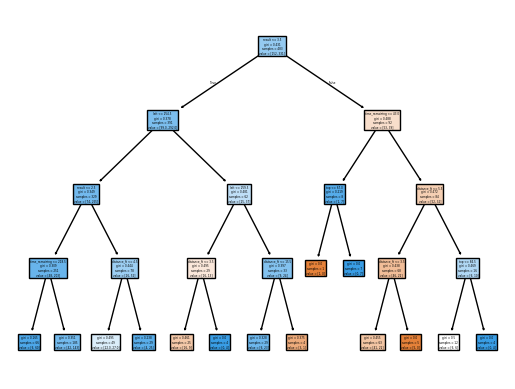

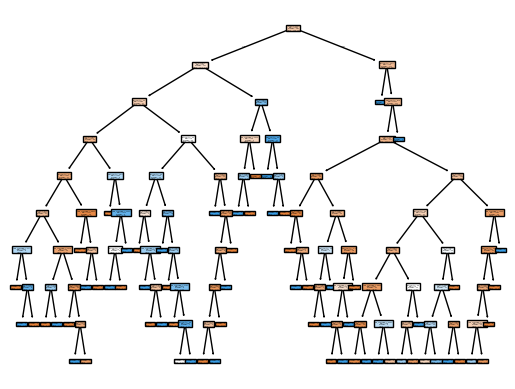

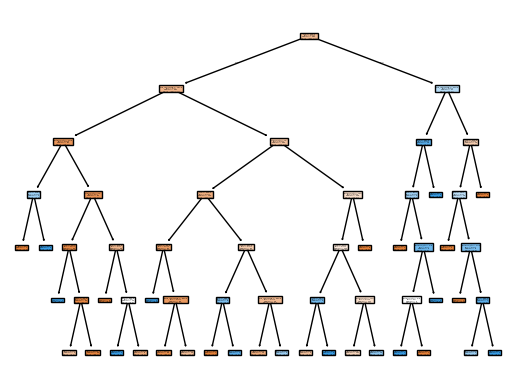

In [119]:
# Initialize and train the decision tree classifier
layup_clf = DecisionTreeClassifier(random_state=100, max_depth=4)
layup_clf.fit(layup_X_train, layup_y_train)

midrange_clf = DecisionTreeClassifier(random_state=100, max_depth=9)
midrange_clf.fit(midrange_X_train, midrange_y_train)

three_clf = DecisionTreeClassifier(random_state=100, max_depth=6)
three_clf.fit(three_X_train, three_y_train)

# Make predictions
layup_y_pred = layup_clf.predict(layup_X_test)
midrange_y_pred = midrange_clf.predict(midrange_X_test)
three_y_pred = three_clf.predict(three_X_test)

tree.plot_tree(layup_clf, feature_names=layup_data.columns, filled=True)
plt.show()

tree.plot_tree(midrange_clf, feature_names=layup_data.columns, filled=True)
plt.show()

tree.plot_tree(three_clf, feature_names=layup_data.columns, filled=True)
plt.show()


Confusion matrix: [[ 10  25]
 [ 19 108]]


Text(0.5, 427.9555555555555, 'Predicted label')

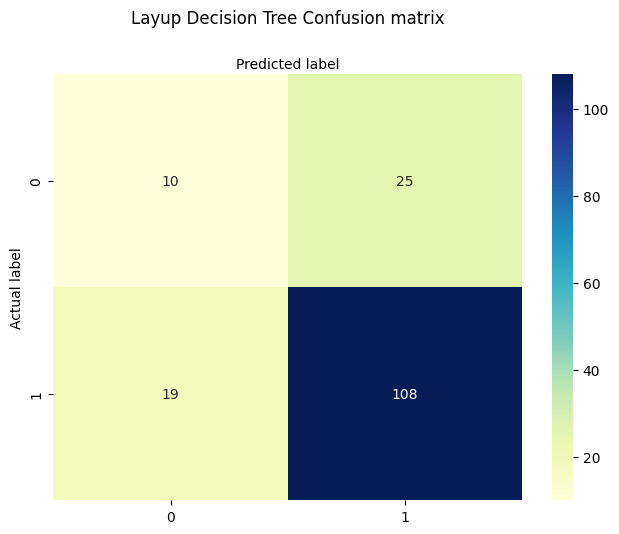

In [113]:
layup_cnf_matrix = metrics.confusion_matrix(layup_y_test, layup_y_pred)
print(f"Confusion matrix: {layup_cnf_matrix}")

class_names = layup_y.unique()  # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(layup_cnf_matrix), annot=True, cmap="YlGnBu", fmt="g")
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title("Layup Decision Tree Confusion matrix", y=1.1)
plt.ylabel("Actual label")
plt.xlabel("Predicted label")

Confusion matrix: [[33 14]
 [32 16]]


Text(0.5, 427.9555555555555, 'Predicted label')

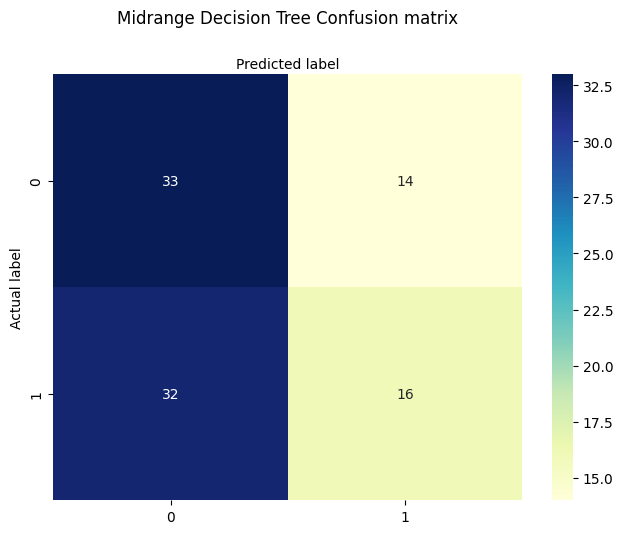

In [114]:
midrange_cnf_matrix = metrics.confusion_matrix(midrange_y_test, midrange_y_pred)
print(f"Confusion matrix: {midrange_cnf_matrix}")

class_names = midrange_y.unique()  # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(midrange_cnf_matrix), annot=True, cmap="YlGnBu", fmt="g")
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title("Midrange Decision Tree Confusion matrix", y=1.1)
plt.ylabel("Actual label")
plt.xlabel("Predicted label")

Confusion matrix: [[69 18]
 [31 10]]


Text(0.5, 427.9555555555555, 'Predicted label')

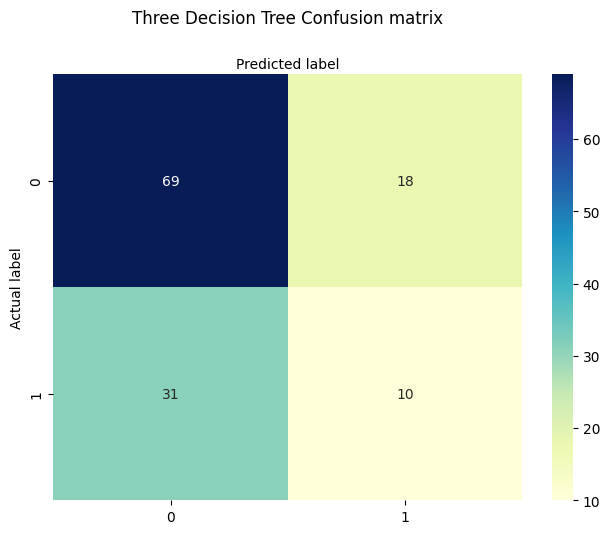

In [115]:
three_cnf_matrix = metrics.confusion_matrix(three_y_test, three_y_pred)
print(f"Confusion matrix: {three_cnf_matrix}")

class_names = three_y.unique()  # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(three_cnf_matrix), annot=True, cmap="YlGnBu", fmt="g")
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title("Three Decision Tree Confusion matrix", y=1.1)
plt.ylabel("Actual label")
plt.xlabel("Predicted label")

In [116]:
# Evaluate the model
print("Accuracy:", accuracy_score(layup_y_test, layup_y_pred))
print("\nClassification Report:\n", classification_report(layup_y_test, layup_y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(layup_y_test, layup_y_pred))

Accuracy: 0.7283950617283951

Classification Report:
               precision    recall  f1-score   support

           0       0.34      0.29      0.31        35
           1       0.81      0.85      0.83       127

    accuracy                           0.73       162
   macro avg       0.58      0.57      0.57       162
weighted avg       0.71      0.73      0.72       162


Confusion Matrix:
 [[ 10  25]
 [ 19 108]]


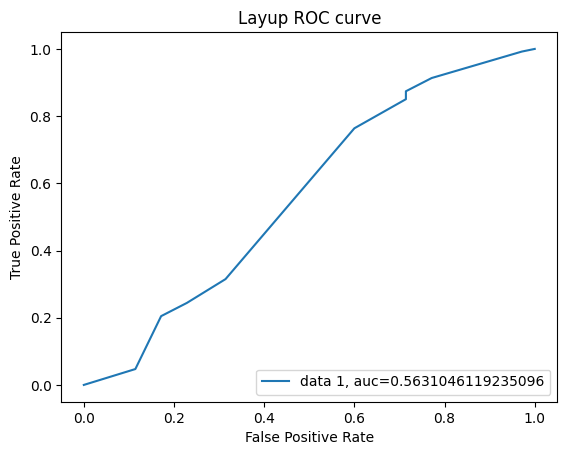

In [117]:
# ROC curve
layup_y_pred_proba = layup_clf.predict_proba(layup_X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(layup_y_test,  layup_y_pred_proba)
auc = metrics.roc_auc_score(layup_y_test, layup_y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Layup ROC curve")
plt.show()